In [11]:
#In this we will read the .csv file generated by RMG.Py's plotting function. Specifically we will be able to generate a 
#plot of the important species and numerically calculate things like selectivity

In [12]:
from rmgpy.species import Species
import matplotlib.pyplot as plt
import pandas
import os.path
import numpy as np
%matplotlib inline

In [13]:
#Simulate the mechanism to generate a csv vile

!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/input.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 5.88784384727 seconds


/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix wi

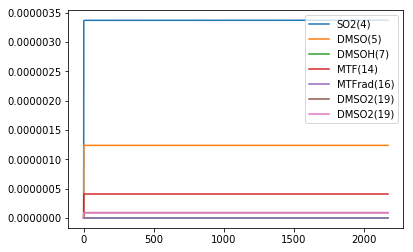

In [14]:
#This cell will generate plots of the species I care about
data = pandas.read_csv('/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/solver/simulation_1_47.csv')
data_mat = data.as_matrix()
#list(data)
#xvar = data.iloc[:,0]
#xvar_mat = xvar.as_matrix()
#print(xvar_mat)
#list(data.columns
for i in range(len(list(data))):
    if 'Time' in list(data)[i]:
        xvar = data.iloc[:,i]
        xvar_mat = xvar.as_matrix()
    if 'DMSO' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        plt.plot(xvar_mat, yvar1_mat, label=list(data)[i])
    if 'SO2' in list(data)[i]:
        yvar2 = data.iloc[:,i]
        yvar2_mat = yvar2.as_matrix()
        plt.plot(xvar_mat, yvar2_mat, label=list(data)[i])
    if 'MTF' in list(data)[i]:
        yvar3 = data.iloc[:,i]
        yvar3_mat = yvar3.as_matrix()
        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
#    if 'CSO' in list(data)[i]:
#        yvar4 = data.iloc[:,i]
#        yvar4_mat = yvar4.as_matrix()
#        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
plt.legend()
#data.plot(x='Time (s)', y='DMSO(6)')
#data.plot(x='Time (s)', y='SO2(23)')
    

In [15]:
#This cell will calculate the final selectivities toward each of the products
for i in range(len(list(data))):
    if 'DMS(1)' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        DMS_init = yvar1_mat[0]
        DMS_final = yvar1_mat[-1]
        Delta_DMS = DMS_init - DMS_final
        DMS_index = i
        
for i in range(len(list(data))):
    yvar1 = data.iloc[:,i]
    yvar1_mat = yvar1.as_matrix()
    final_mole_fraction = yvar1_mat[-1]
    print str(list(data)[i]) + ': ' + str(final_mole_fraction/Delta_DMS)
        

Time (s): 240309391.354
Volume (m^3): 2742.66486542
N2: 87995.6123088
Ne: 0.0
DMS(1): 0.660419886572
HOOH(2): 0.827624141827
OH(3): 5.05418823817e-12
SO2(4): 0.372915495784
DMSO(5): 0.136834239983
O2(6): 22691.7618188
DMSOH(7): 2.2817589501e-17
OOH(8): 5.38217732628e-08
DMSrad(9): 1.06159366233e-15
H2O(10): 2.42713888948
S(11): 3.4965974363e-07
C2H5OS(12): 6.24693229619e-22
CSCOH(13): 0.0508069628845
MTF(14): 0.045108895188
CH3(15): 2.76846860681e-13
MTFrad(16): 6.69436479752e-20
CH4(17): 0.000417306470946
S(18): 3.24741821346e-38
DMSO2(19): 0.00993097966816
CSrad(20): 2.33269846275e-10
CH3O2S(21): 1.33052945253e-11
CH2S(22): 0.285293369424
CSOrad(23): 4.16443339165e-11
O(24): 3.76757061789e-17
CH3O2S(25): 6.21365717924e-15
CH2O3(26): 0.116498594708
CO2(27): 2.00654573929e-07
H(28): 3.9664421087e-13
HCO(33): 1.84573748728e-15
CH2O(37): 0.655607104825
CH3O(44): 9.85223659744e-10
CH3SH(54): 0.0791374636695
S(83): 6.2078035006e-12
S(87): 1.76748122177e-09
CHOSJ(97): 9.53485051596e-07
C2H3

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [16]:
#This will automatically generate the temperature and O2 comparison plots based on a certain model
index = 60
#Read in the base input file
inputpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/input.py' 
with open(inputpath) as f:
    log = f.read().splitlines()
#Reference the base chem.inp and species dictionary
chempath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/chem_annotated.inp'
dictpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/species_dictionary.txt'
#make a new directory for the various input files and new .csv files
basepath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/ExperimentalComparisons'
os.makedirs(basepath)

T_vec = [260, 270, 280, 290, 298]
O2_vec = [0, 200, 500]
N2_vec = [0.99994, 0.79994, 0.49994]

#write each of the 15 input files to their own folder in the Experimental Comparisons Folder
#Loop over temperatures
for j in range(len(T_vec)):
    #Loop over Oxygen content
    for k in range(len(O2_vec)):
        basepath2 = basepath + '/' + str(T_vec[j]) + '_' + str(O2_vec[k])
        os.makedirs(basepath2)
        filename = os.path.join(basepath2, 'input_'+ str(T_vec[j]) + '_' + str(O2_vec[k]) + '.py')
        file = open(filename, 'wb')
        for n in xrange(len(log)):
            if 'temperature=(' in log[n]:
                file.write('    temperature=(' + str(T_vec[j]) + ',\'K\'),\n')
            elif '"O2":' in log[n]:
                file.write('        "O2": 0.' + str(O2_vec[k]) +',\n')
            elif '"N2":' in log[n]:
                file.write('        "N2": ' + str(N2_vec[k]) + ',\n')
            else:
                file.write(log[n] + '\n')
        file.close()
#Run the input files with the simulate script
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/260_0/input_260_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/260_200/input_260_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/260_500/input_260_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/270_0/input_270_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/270_200/input_270_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/270_500/input_270_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/280_0/input_280_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/280_200/input_280_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/280_500/input_280_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/290_0/input_290_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/290_200/input_290_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/290_500/input_290_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/298_0/input_298_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/298_200/input_298_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/ExperimentalComparisons/298_500/input_298_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t60/chemkin/species_dictionary.txt

#Compare the DMSO, SO2, DMSO2, MTF, and OCS concentration to experiments

Using Theano backend.
Simulation took 3.1174929142 seconds
Using Theano backend.
Simulation took 6.72977495193 seconds
Using Theano backend.
Simulation took 5.08024001122 seconds
Using Theano backend.
Simulation took 5.28181409836 seconds
Using Theano backend.
Simulation took 6.71280288696 seconds
Using Theano backend.
Simulation took 4.81549906731 seconds
Using Theano backend.
Simulation took 5.2887468338 seconds
Using Theano backend.
Simulation took 5.4223511219 seconds
Using Theano backend.
Simulation took 6.26571512222 seconds
Using Theano backend.
Simulation took 6.52400994301 seconds
Using Theano backend.
Simulation took 5.23347401619 seconds
Using Theano backend.
Simulation took 5.51535797119 seconds
Using Theano backend.
Simulation took 5.99253988266 seconds
Using Theano backend.
Simulation took 6.47069692612 seconds
Using Theano backend.
Simulation took 5.71854901314 seconds


/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:58: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:53:

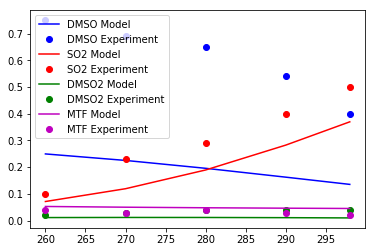

In [19]:
#This will read the .csv files generated above and create comparison plots for DMSO, SO2, DMSO2, MTF, and OCS
Tvec = [260, 270, 280, 290, 298]
Pvec = [0, 200, 500]

DMSO_exp = np.zeros((3,5))
DMSO_model = np.zeros((3,5))
DMSO_exp[1][:] = [0.75, 0.69, 0.65, 0.54, 0.4]

SO2_exp = np.zeros((3,5))
SO2_model = np.zeros((3,5))
SO2_exp[1][:] = [0.1, 0.23, 0.29, 0.4, 0.5]

DMSO2_exp = np.zeros((3,5))
DMSO2_model = np.zeros((3,5))
DMSO2_exp[1][:] = [0.02, 0.03, 0.04, 0.04, 0.04]

MTF_exp = np.zeros((3,5))
MTF_model = np.zeros((3,5))
MTF_exp[1][:] = [0.04, 0.03, 0.04, 0.03, 0.02]

OCS_exp = np.zeros((3,5))
OCS_model = np.zeros((3,5))

#Fill in the matrices
#Loop over temperature
for j in range(len(Tvec)):
    #Loop over Oxygen content
    for k in range(len(Pvec)):  
        data = pandas.read_csv(basepath + '/' + str(Tvec[j]) + '_' + str(Pvec[k]) + '/solver/simulation_1_47.csv')
        data_mat = data.as_matrix()
        i = 0
        for i in range(len(list(data))):
            if 'DMS(1)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                DMS_init = yvar1_mat[0]
                DMS_final = yvar1_mat[-1]
                Delta_DMS = DMS_init - DMS_final
                DMS_index = i
        for i in range(len(list(data))):
            if 'DMSO(5)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'SO2(4)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                SO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'DMSO2(19)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'MTF(14)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                MTF_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'COS(101)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                OCS_model[k][j] = final_mole_fraction/Delta_DMS

#plot the temperature variance at constant 200 mbar O2 
plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')

plt.plot(Tvec, SO2_model[1][:], 'r', label='SO2 Model')
plt.plot(Tvec, SO2_exp[1][:], 'ro', label='SO2 Experiment')

plt.plot(Tvec, DMSO2_model[1][:], 'g', label='DMSO2 Model')
plt.plot(Tvec, DMSO2_exp[1][:], 'go', label='DMSO2 Experiment')

plt.plot(Tvec, MTF_model[1][:], 'm', label='MTF Model')
plt.plot(Tvec, MTF_exp[1][:], 'mo', label='MTF Experiment')

#plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
#plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')
plt.legend()

In [30]:
DMSO_exp = np.zeros((3,5))

In [69]:
#This cell will run sensitivity analysis using RMG-Py solver

#submit the job
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated2.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 122.001851082 seconds


In [33]:
#test some other mechanism to see if it is my mechanism's problem or RMG's

!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 7.5404279232 seconds


In [ ]:
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt
